#Clustering w/ K-Means

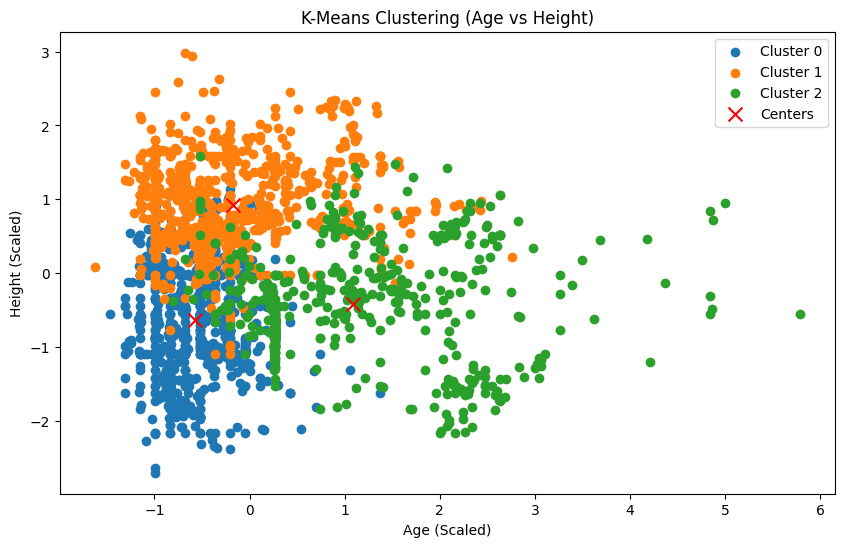

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('ObesityDataSet.csv')

features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster in np.unique(kmeans.labels_):
    cluster_data = X_scaled[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')

plt.title('K-Means Clustering (Age vs Height)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Height (Scaled)')
plt.legend()
plt.show()